In [2]:
# Imports
import pandas as pd 
import numpy as np
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [3]:
# Load data
data = pd.read_excel('/Users/ginnyghang/cs148proj/M148_Project/hannah/clean_data.xlsx')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [125]:
#features_keep = ['danceability', 'energy', 'acousticness', 'instrumentalness','valence','liveness', 'tempo']
#data_subset = data[features_keep]

# Separating out the features
x = data.iloc[:, 5:19] # subsetted to features, excluded track genre
# Separating out the target (genre)
y = data.loc[:,['track_genre']].values

In [126]:
# standardize features
X = x - np.mean(x, axis=0)
X.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,39.759534,1181.437971,-0.086001,0.111431,-0.176051,-4.286616,1.684656,-0.63658,0.055835,-0.29321,-0.171180,0.141812,0.243299,-34.488294
1,21.759534,-79874.562029,-0.086001,-0.144569,-0.471051,-4.286616,-8.804344,0.36342,-0.010865,0.59859,-0.171176,-0.115188,-0.204701,-44.916294
2,23.759534,-18658.562029,-0.086001,-0.126569,-0.278051,-5.286616,-1.303344,0.36342,-0.031465,-0.11541,-0.171181,-0.099188,-0.351701,-46.073294
3,37.759534,-27551.562029,-0.086001,-0.298569,-0.577451,-5.286616,-10.084344,0.36342,-0.050865,0.57959,-0.171111,-0.084188,-0.328701,59.334706
4,48.759534,-30631.562029,-0.086001,0.053431,-0.194051,-3.286616,-1.250344,0.36342,-0.034565,0.14359,-0.171181,-0.133288,-0.304701,-2.456294


In [127]:
pca = PCA(n_components=14, svd_solver='full')

In [129]:
pca.fit(np.asarray(X))

PCA(n_components=14, svd_solver='full')

In [130]:
print(pca.singular_values_)

[3.32299427e+07 8.84598056e+03 6.13514051e+03 1.49066070e+03
 1.05936390e+03 1.42281485e+02 9.60008750e+01 8.49758927e+01
 8.00894029e+01 6.97775674e+01 6.02354592e+01 4.14895893e+01
 3.44645369e+01 2.73619261e+01]


In [131]:
print(pca.components_)

[[-4.57335216e-06  1.00000000e+00 -1.66822155e-07 -1.10561862e-07
   1.42498888e-07  3.53682520e-07 -2.68459372e-07 -1.72512106e-07
  -6.01932598e-08 -3.27789547e-07  3.55861229e-07  2.02286947e-08
  -3.59128587e-07  5.82459630e-06]
 [ 1.10940056e-02 -5.76005345e-06 -3.18683481e-05 -2.71358555e-04
   2.14887972e-03  1.00734766e-03  3.81070183e-02 -2.89695914e-06
   8.78304932e-06 -2.48529272e-03 -5.70932945e-04  2.57272196e-05
   7.21798959e-04  9.99205708e-01]
 [ 9.99757661e-01  4.64628264e-06  7.48423425e-04  5.43470217e-04
   1.66985591e-04  4.93197941e-04  1.84252067e-02 -4.10838880e-04
  -2.54453963e-04 -6.30344983e-04 -1.98290995e-03 -1.19402513e-04
  -2.09073394e-04 -1.18060523e-02]
 [-1.89189759e-02  3.83208659e-07  6.08071559e-03  9.37601110e-03
   3.68823741e-02  5.02541892e-02  9.95919636e-01 -4.12865735e-03
   1.35038442e-03 -3.69597563e-02 -2.70653129e-02  3.36360304e-03
   1.41940013e-02 -3.80166420e-02]
 [ 4.42784727e-04 -3.73797467e-07 -1.35831749e-05  8.33319817e-04
  

In [132]:
pca.components_.shape

(14, 14)

In [133]:
pca_transformed = np.matmul(X, np.transpose(pca.components_))


In [134]:
unique_genres = data['track_genre'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_genres)))
# Create a dictionary to map each genre to a color
color_dict = {genre: colors[i] for i, genre in enumerate(unique_genres)}

# Map genres in data['genre'] to their respective colors
data['genre_color'] = data['track_genre'].map(color_dict)


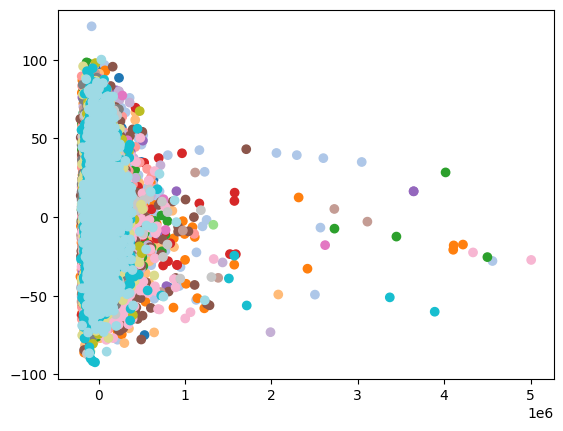

In [135]:
x = pca_transformed.iloc[:, 0]
y = pca_transformed.iloc[:, 1]


plt.scatter(x, y, c=data['genre_color'])

In [136]:
top_pcs1_ids = pca.components_[0,:].argsort()[::-1]
top_pcs1_ids[0:5]

array([ 1, 13, 10,  5,  4])

In [137]:
print("PC1 top genres:\n", data['track_genre'][top_pcs1_ids[0:5]])

PC1 top genres:
 1     acoustic
13    acoustic
10    acoustic
5     acoustic
4     acoustic
Name: track_genre, dtype: object


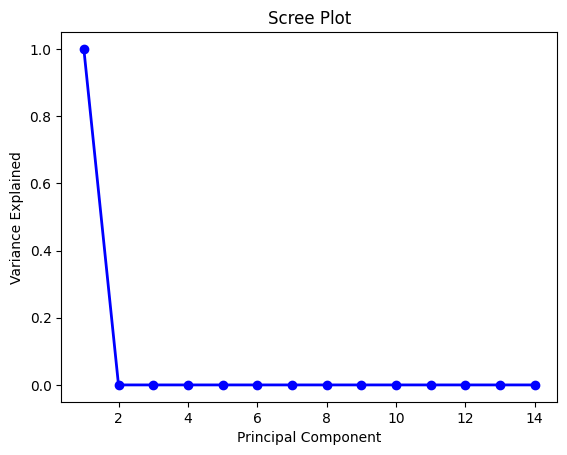

In [138]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# Get the explained variance ratio
# measure of how much of the total variance in the original dataset is explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.99999892e-01 7.08651531e-08 3.40870797e-08 2.01232616e-09
 1.01632148e-09 1.83331693e-11 8.34624542e-12 6.53931473e-12
 5.80885960e-12 4.40932812e-12 3.28583098e-12 1.55890281e-12
 1.07568636e-12 6.78006879e-13]
